In [5]:
!pip install python-dotenv
#!pip install openai
#!pip install --upgrade langchain

  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)


In [12]:
import openai
import langchain

In [13]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

## ChatGPT

In [14]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message["content"]

In [9]:
get_completion("What is 1+1?")

'As an AI language model, I can tell you that the answer to 1+1 is 2.'

In [10]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

style = """American English \
in a calm and respectful tone
"""

prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks 
into a style that is American English in a calm and respectful tone
.
text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse,the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



In [15]:
get_completion(prompt)

'I am quite upset that my blender lid came off and caused my smoothie to splatter all over my kitchen walls. Additionally, the warranty does not cover the cost of cleaning up the mess. Would you be able to assist me, please? Thank you kindly.'

## Chat API : LangChain

In [16]:
from langchain.chat_models import ChatOpenAI

In [17]:
# To control the randomness and creativity of the generated text by an LLM, use temperature = 0.0
chat = ChatOpenAI(temperature=0.0)
chat

ChatOpenAI(verbose=False, callbacks=None, callback_manager=None, client=<class 'openai.api_resources.chat_completion.ChatCompletion'>, model_name='gpt-3.5-turbo', temperature=0.0, model_kwargs={}, openai_api_key=None, openai_api_base=None, openai_organization=None, openai_proxy=None, request_timeout=None, max_retries=6, streaming=False, n=1, max_tokens=None)

In [18]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [20]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)
prompt_template

ChatPromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n', template_format='f-string', validate_template=True), additional_kwargs={})])

In [21]:
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n', template_format='f-string', validate_template=True)

In [22]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [23]:
customer_style = """American English \
in a calm and respectful tone
"""
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""
customer_messages = prompt_template.format_messages(
                    style=customer_style,
                    text=customer_email)

In [27]:
print(type(customer_messages))
print(type(customer_messages[0]))
print(customer_messages[0])

<class 'list'>
<class 'langchain.schema.HumanMessage'>
content="Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nArrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!\n```\n" additional_kwargs={} example=False


In [28]:
# Call the LLM to translate to the style of the customer message
customer_response = chat(customer_messages)

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')).


In [29]:
print(customer_response.content)

I'm really frustrated that my blender lid flew off and made a mess of my kitchen walls with smoothie. To add to my frustration, the warranty doesn't cover the cost of cleaning up my kitchen. Can you please help me out, friend?


In [30]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!
"""
service_style_pirate = """\
a polite tone \
that speaks in English Pirate\
"""
service_messages = prompt_template.format_messages(
    style=service_style_pirate,
    text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Pirate. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!
```



In [31]:
service_response = chat(service_messages)
print(service_response.content)

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')).


Ahoy there, matey! I must kindly inform ye that the warranty be not coverin' the expenses o' cleaning yer galley, as 'tis yer own fault fer misusin' yer blender by forgettin' to put the lid on afore startin' it. Aye, tough luck! Farewell and may the winds be in yer favor!


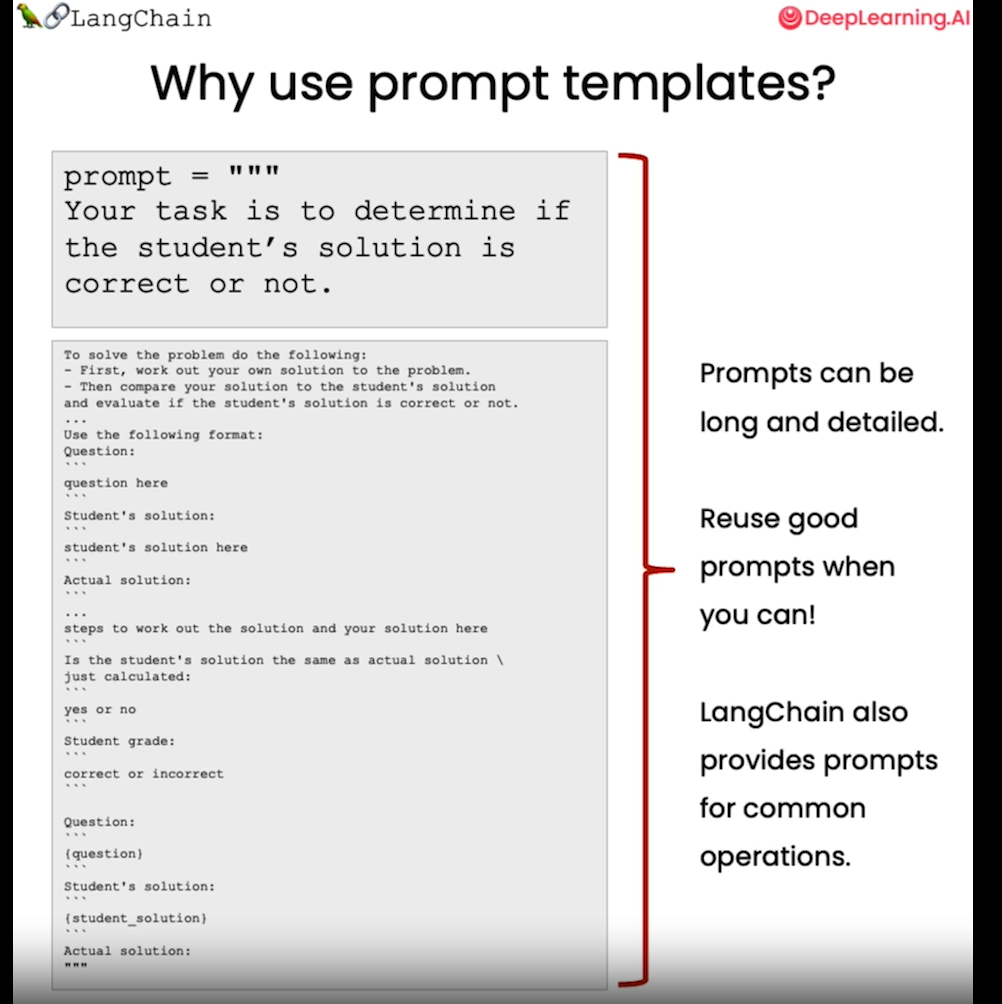

## Output Parsers

Let's start with defining how we would like the LLM output to look like:

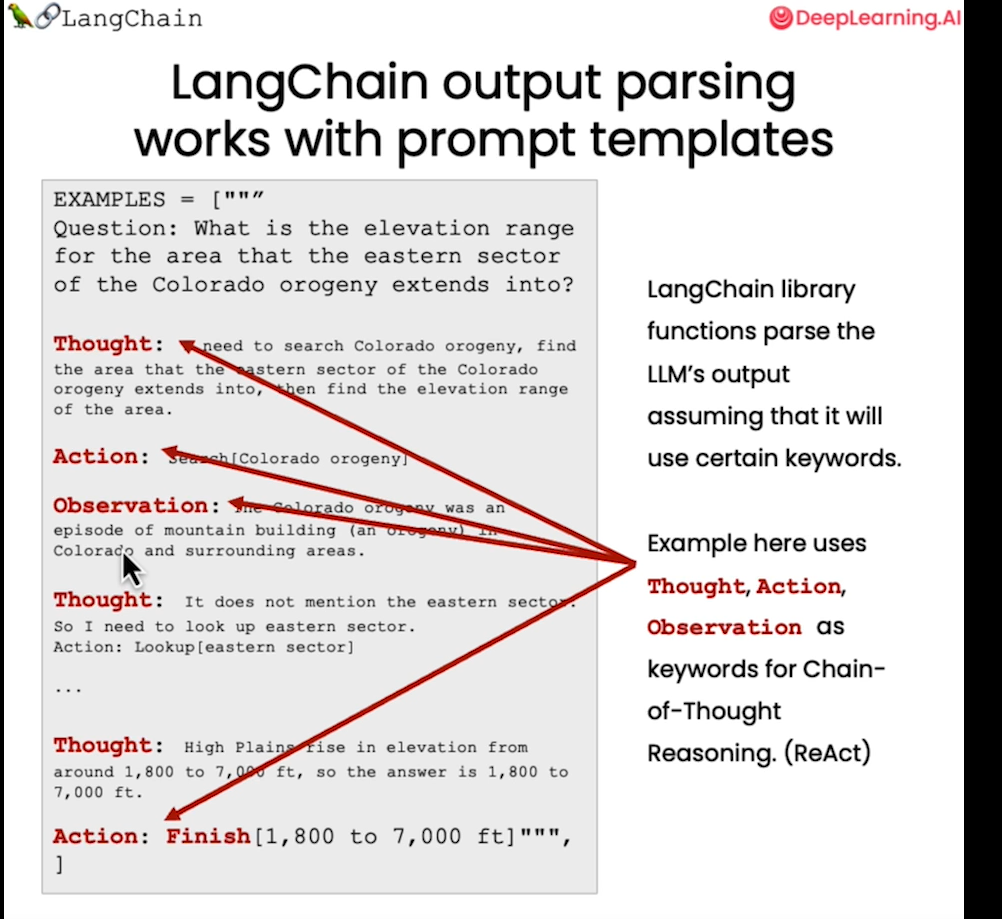

In [32]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [33]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] output_parser=None partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], output_parser=None, partial_variables={}, template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n', template_format='f-string', validate_template=True), additional_kwargs={})]


In [34]:
messages = prompt_template.format_messages(text=customer_review)
chat = ChatOpenAI(temperature=0.0)
response = chat(messages)
print(response.content)

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')).


{
    "gift": true,
    "delivery_days": 2,
    "price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}


In [36]:
type(response.content)
# The above output is a string which is getting printed in a json format . It is not a json actually

str

In [37]:
# You will get an error by running this line of code 
# because'gift' is not a dictionary , 'gift' is a string
response.content.get('gift')

AttributeError: 'str' object has no attribute 'get'

### Parse the LLM output string into a Python dictionary

In [38]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

In [42]:
gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

response_schemas = [gift_schema, 
                    delivery_days_schema,
                    price_value_schema]

In [47]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()

In [48]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review, 
                                format_instructions=format_instructions)

In [49]:
print(messages[0].content)

For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "\`\`\`json" and "

In [50]:
response = chat(messages)
print(response.content)

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')).


```json
{
	"gift": true,
	"delivery_days": "2",
	"price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}
```


In [51]:
type(response.content)

str

In [54]:
output_dict = output_parser.parse(response.content)
output_dict

{'gift': True,
 'delivery_days': '2',
 'price_value': ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]}

In [55]:
type(output_dict)

dict

In [56]:
output_dict.get('delivery_days')

'2'